## Importing the libraries
### Linear Autoencoder

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.18.0'

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [9]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
y_train[0]

5

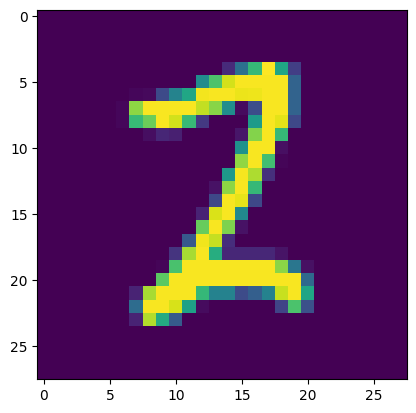

In [14]:
i = np.random.randint(0, 59999)
plt.imshow(X_train[i])

In [15]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

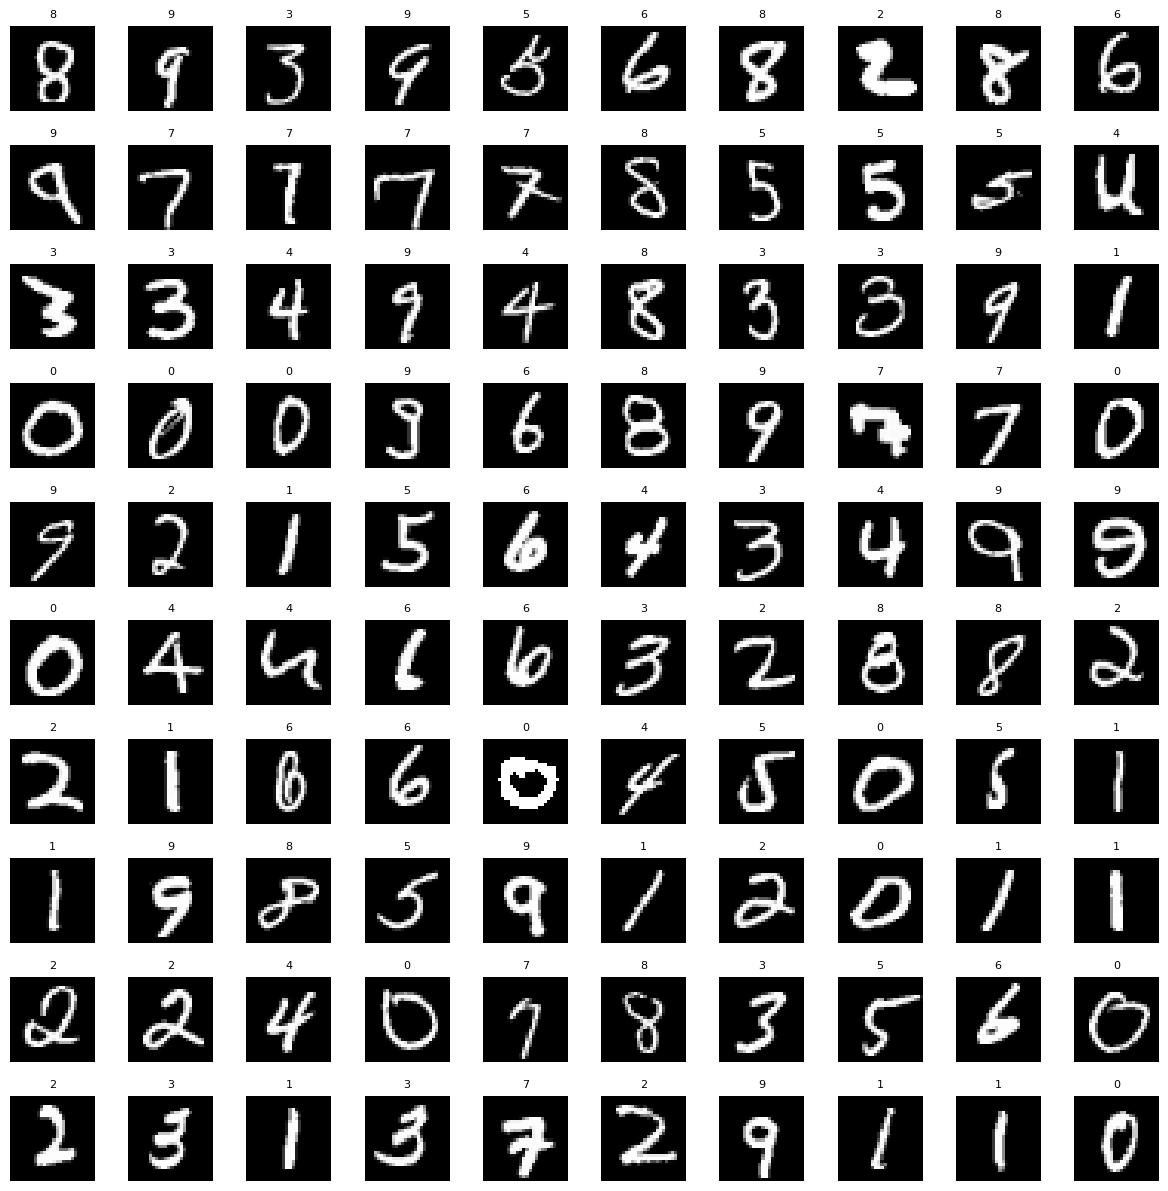

In [20]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize = (15,15))
#print(axes.shape)
axes = axes.ravel() # (10, 10)->[100]
for i in np.arange(0, width*height):
    index = np.random.randint(0, 59999)
    axes[i].imshow(X_train[index], cmap = 'gray')
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)


## Preprocessing the image

In [21]:
X_train[0].min(), X_train.max()
X_test[0].min(), X_test.max()

(0, 255)

In [22]:
X_train = X_train /255
X_test = X_test/255

In [23]:
X_train[0].min(), X_train.max()
X_test[0].min(), X_test.max()

(0.0, 1.0)

In [27]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_train.shape

(60000, 784)

In [30]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

## Build and train linear Autoencoder

In [31]:
# 784 -- 128 -- 64 -- 32 -- 64 -- 128 -- 784

In [ ]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Dense(units = 128, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))

#Decoder
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))

In [34]:
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [36]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.0084 - loss: 0.2011
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0121 - loss: 0.1123
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0118 - loss: 0.1016
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0124 - loss: 0.0955
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0133 - loss: 0.0919
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0133 - loss: 0.0896
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0133 - loss: 0.0882
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0140 - loss: 0.0867
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0133 - loss: 0.0858
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0146 - loss: 0.0848
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0139 - loss: 0.0843
Epoch 12/50
1875/1875 ━━━━━

## Encoding the images

In [39]:
autoencoder.inputs

[<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor>]

In [43]:
autoencoder.get_layer('dense_3').output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_6>

In [45]:
encoder = Model(inputs = autoencoder.inputs , outputs = autoencoder.get_layer('dense_3').output )

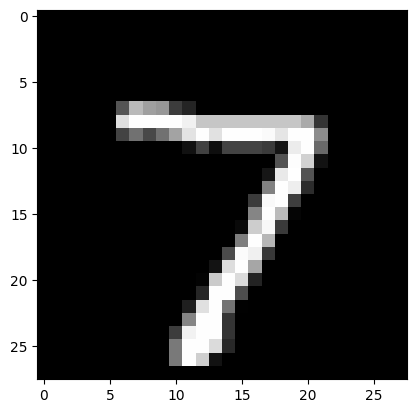

In [47]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray') # reshaped from 784 --> 28 * 28

In [52]:
X_test[0].reshape(1,-1).shape


(1, 784)

In [54]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 784))
  warnings.warn(msg)


In [55]:
encoded_image, encoded_image.shape

(array([[ 4.7248607,  9.514409 ,  2.6148527,  5.869179 ,  0.       ,
          6.018879 ,  3.8939865,  5.065218 ,  6.333008 ,  4.422712 ,
          4.6972237,  1.123032 ,  8.329982 ,  4.411911 ,  4.94996  ,
          4.307302 ,  1.5654557,  3.300605 , 10.864965 ,  0.       ,
          4.690486 ,  0.       ,  7.054633 ,  4.311943 ,  7.078444 ,
          8.916464 ,  8.322437 ,  4.6954684,  4.395519 ,  5.4049573,
          5.477852 ,  6.578804 ]], dtype=float32),
 (1, 32))

In [57]:
8*4

32

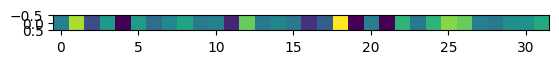

In [83]:
plt.imshow(encoded_image)

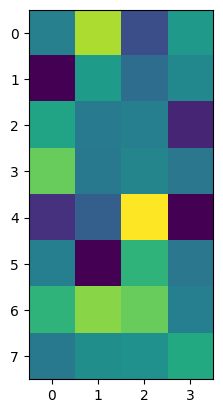

In [58]:
plt.imshow(encoded_image.reshape(8,4))

## Decoding the images

In [59]:
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [64]:
input_decoder_layer = Input(shape=(32,)) # Need to define Custom input Layer
decoder_layer_1 = autoencoder.layers[3]
decoder_layer_2 = autoencoder.layers[4]
decoder_layer_3 = autoencoder.layers[5]
decoder = Model(inputs = input_decoder_layer, outputs = decoder_layer_3(decoder_layer_2(decoder_layer_1(input_decoder_layer))))
decoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
decoded_image = decoder.predict(encoded_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [66]:
decoded_image.shape

(1, 784)

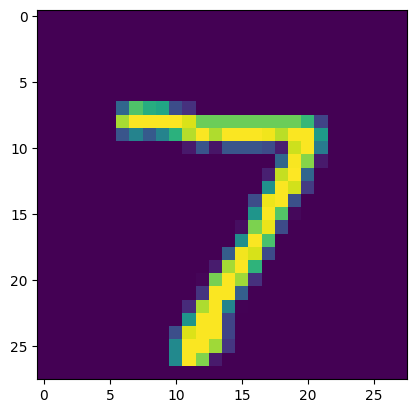

In [68]:
plt.imshow(X_test[0].reshape(28,28)) # Original Image

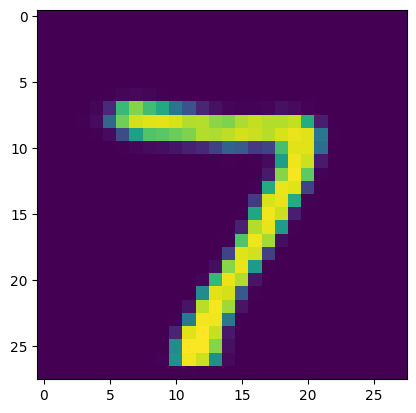

In [69]:
plt.imshow(decoded_image.reshape(28,28))

# Encoding and decoding the test images

In [70]:
X_test.shape

(10000, 784)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


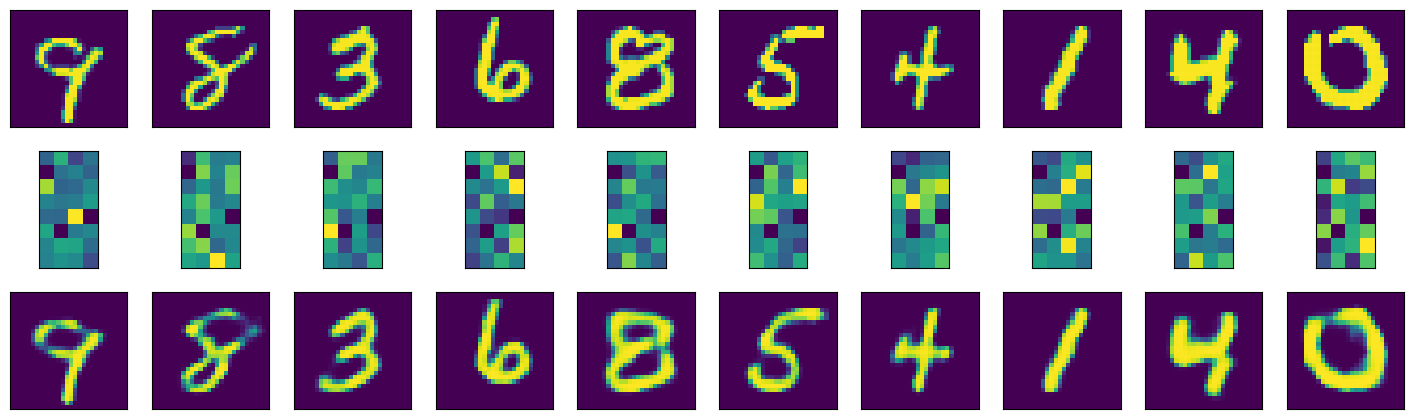

In [81]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, n_images)
#test_images
plt.figure(figsize=(18,18))
for i , index in enumerate(test_images):
    # print(i, index)
    # Original Image
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[index].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    # Coded images
    ax = plt.subplot(10,10,i+1+n_images)
    encoded_images = encoder.predict(X_test[index].reshape(1,-1))
    plt.imshow(encoded_images.reshape(8,4))
    plt.xticks(())
    plt.yticks(())

    # Decoded images
    ax = plt.subplot(10,10,i+1+n_images*2)
    decoded_images = decoder.predict(encoded_images)
    plt.imshow(decoded_images.reshape(28,28))
    plt.xticks(())
    plt.yticks(())

## Convolutional autoencoder

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten, BatchNormalization, AveragePooling2D

## Loading the Dataset

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

## Visualising the images

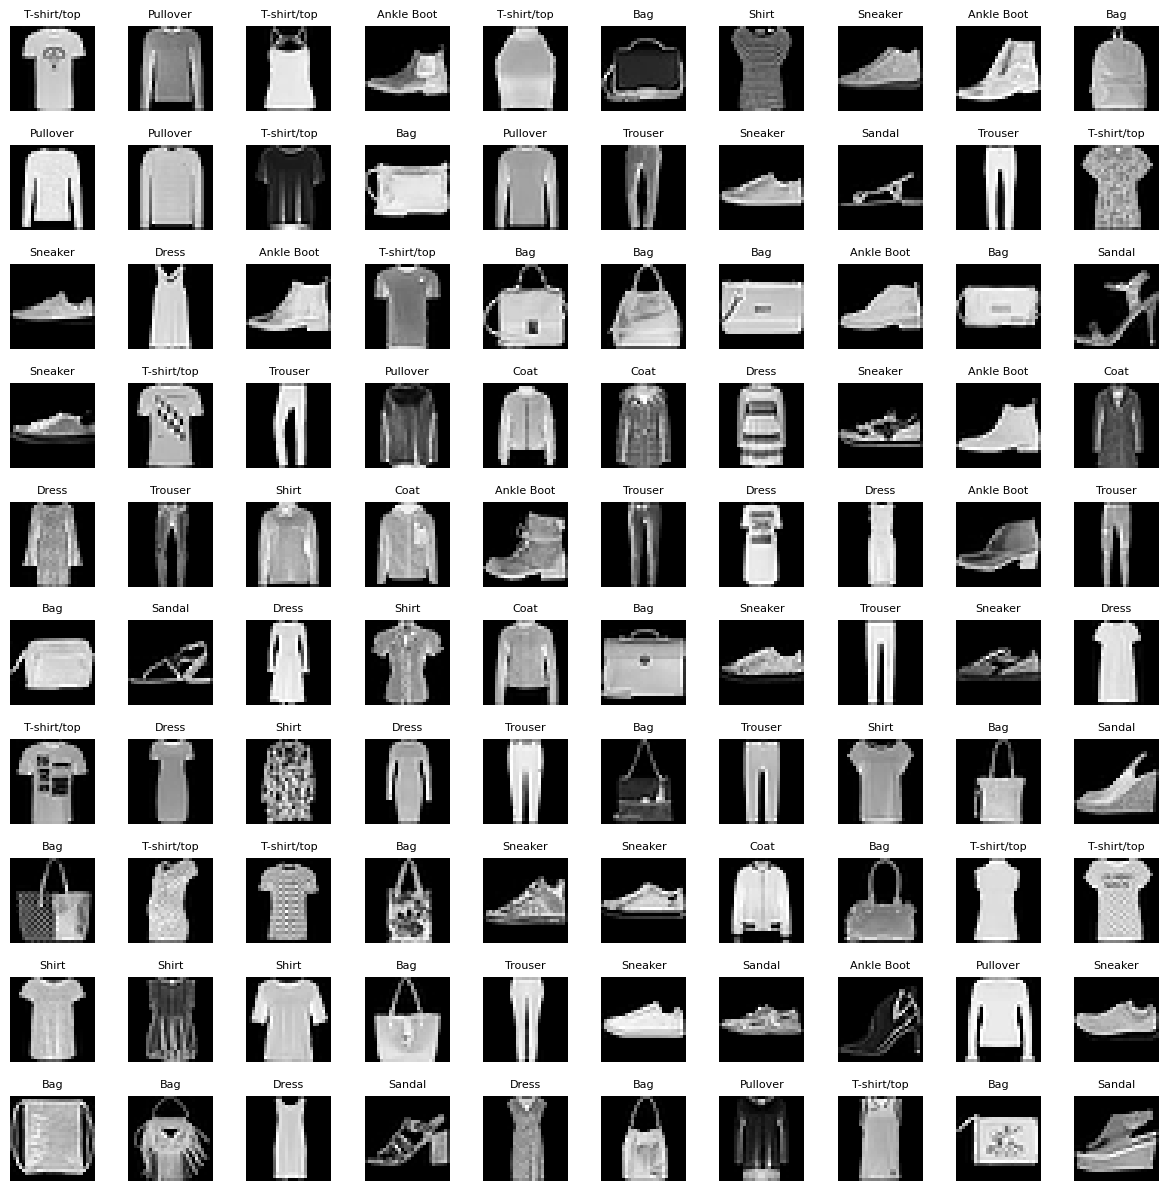

In [12]:
# Fashion - MNIST

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize = (15,15))
#print(axes.shape)
axes = axes.ravel() # (10, 10)->[100]
for i in np.arange(0, width*height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray')
    axes[i].set_title(classes[y_train[index]], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)


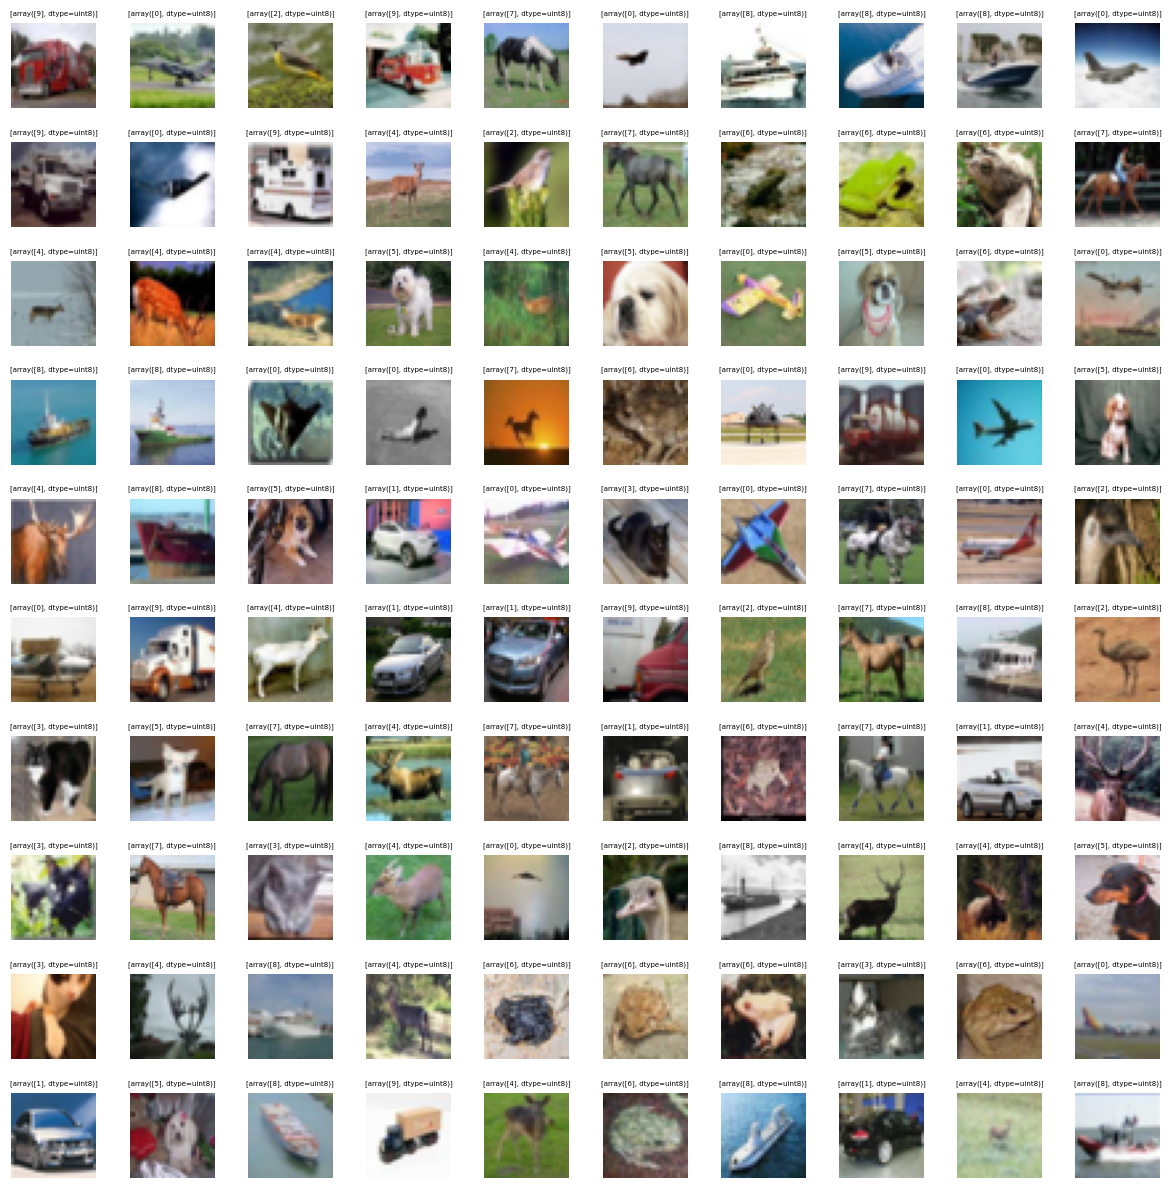

In [8]:
# Cifar-10

width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize = (15,15))
#print(axes.shape)
axes = axes.ravel() # (10, 10)->[100]
for i in np.arange(0, width*height): 
    index = np.random.randint(0, 50000)
    axes[i].imshow(X_train[index], cmap = 'gray')
    axes[i].set_title([y_train[index]], fontsize=5)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

## Preprocessing the image

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [11]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Building and training the autoencoder

In [26]:
# Fashion-MNIST

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation= 'relu', input_shape = (28,28,1), padding='valid'))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation= 'relu', padding= 'same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding= 'same'))

#autoencoder.summary() 

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation= 'relu', strides=(2,2), padding= 'same'))
autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid',padding='same'))
autoencoder.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# if padding is valid
# Output = (Input - Filter + 1) / Stride
# Input : (28, 28, 1)
# Filter : 3
# Output = (28-3+1)/1 = 26 -> (26, 26, 16)

In [22]:
#Cifar-10

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation= 'relu', input_shape = (32,32,3), padding='valid'))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation= 'relu', padding= 'same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding= 'same'))

#autoencoder.summary() 

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation= 'relu', strides=(2,2), padding= 'same'))
autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=3, kernel_size=(3,3), activation='sigmoid',padding='same'))
autoencoder.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 15, 15, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_25 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_26 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_27 (UpSampling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 32, 32, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
autoencoder_1 = tf.keras.models.Sequential()

# Encoder

autoencoder_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = (32,32,3), padding='same'))
autoencoder_1.add(BatchNormalization())
autoencoder_1.add(AveragePooling2D((2,2)))

autoencoder_1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder_1.add(BatchNormalization())
autoencoder_1.add(AveragePooling2D((2,2)))

autoencoder_1.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder_1.add(BatchNormalization())
autoencoder_1.add(AveragePooling2D((2,2))) # Encoded Image

# Decoder
autoencoder_1.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder_1.add(BatchNormalization())
autoencoder_1.add(UpSampling2D((2,2)))

autoencoder_1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder_1.add(BatchNormalization())
autoencoder_1.add(UpSampling2D((2,2)))

autoencoder_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder_1.add(BatchNormalization())
autoencoder_1.add(UpSampling2D((2,2)))

autoencoder_1.add(Conv2D(filters=3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))
autoencoder_1.summary()



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)             │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_27            │ (None, 16, 16, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_28            │ (None, 8, 8, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_29            │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 4, 4, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_40 (UpSampling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_41 (UpSampling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_42 (UpSampling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,963 (206.89 KB)

 Trainable params: 52,515 (205.14 KB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
autoencoder.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [51]:
autoencoder_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs=50)

In [52]:
autoencoder_1.fit(X_train, X_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.5862 - loss: 0.5964
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7151 - loss: 0.5693
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7379 - loss: 0.5653
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7465 - loss: 0.5642
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7516 - loss: 0.5625
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7573 - loss: 0.5624
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7591 - loss: 0.5615
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7601 - loss: 0.5608
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7622 - loss: 0.5604
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7636 - loss: 0.5608
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7630 - loss: 0.5596
Epoch 12

## Saving the Model

In [53]:
model_json = autoencoder_1.to_json()
with open('autoencoder_1_2.json', 'w') as json_file:
    json_file.write(model_json)

In [54]:
from keras.models import save_model
network_saved = save_model(autoencoder_1, 'D:/COMPUTER VISION MASTERCLASS/Autoencoder/autoencoder_1_weights.hdf5')

In [55]:
with open('autoencoder_1_2.json' , 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_21", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 32, 32, 3], "dtype": "float32", "sparse": false, "name": "input_layer_21"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_105", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.

## Loading the Model

In [56]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('autoencoder_1_weights.hdf5')
network_loaded.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
network_loaded.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)             │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_27            │ (None, 16, 16, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_28            │ (None, 8, 8, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_29            │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 4, 4, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 4, 4, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_40 (UpSampling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_41 (UpSampling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_42 (UpSampling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,963 (206.89 KB)

 Trainable params: 52,515 (205.14 KB)

 Non-trainable params: 448 (1.75 KB)

In [58]:
encoder = Model(inputs = network_loaded.inputs, outputs = network_loaded.get_layer('average_pooling2d_29').output )
encoder.summary()

Model: "functional_281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_27            │ (None, 16, 16, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_28            │ (None, 8, 8, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_29            │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,328 (98.94 KB)

 Trainable params: 25,104 (98.06 KB)

 Non-trainable params: 224 (896.00 B)

In [59]:
coded_test_Images = encoder.predict(X_test)

 23/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_21']
Received: inputs=Tensor(shape=(32, 32, 32, 3))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_21']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


In [60]:
coded_test_Images.shape

(10000, 4, 4, 16)

In [61]:
decoded_test_images = network_loaded.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [62]:
decoded_test_images.shape

(10000, 32, 32, 3)

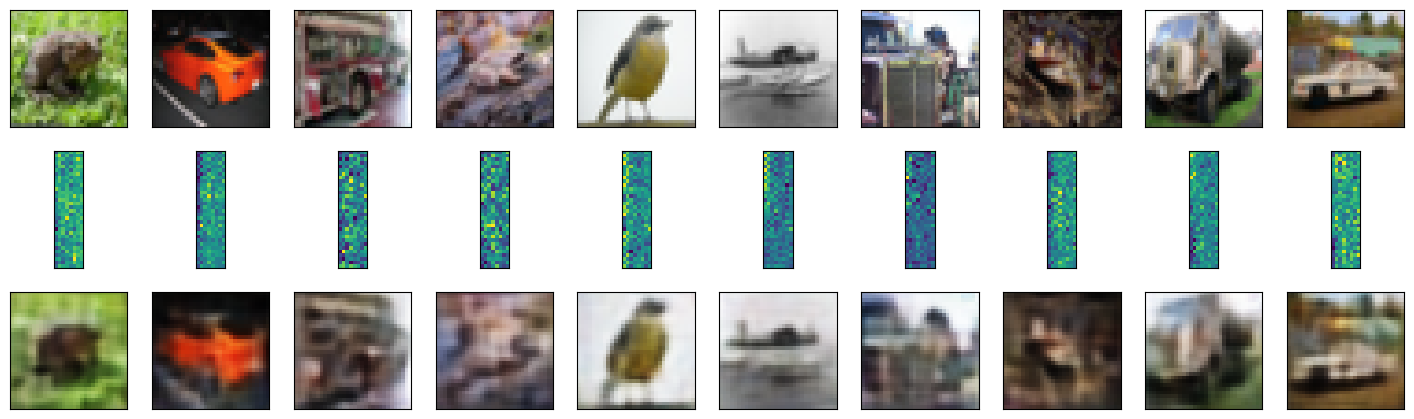

In [68]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, n_images)
#test_images
plt.figure(figsize=(18,18))
for i , index in enumerate(test_images):
    # print(i, index)
    # Original Image
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[index].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())
    
    # Coded images
    ax = plt.subplot(10,10,i+1+n_images)
    plt.imshow(coded_test_Images[index].reshape(32,8)) # 32*8->256
    plt.xticks(())
    plt.yticks(())

    # Decoded images
    ax = plt.subplot(10,10,i+1+n_images*2)
    plt.imshow(decoded_test_images[index].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())